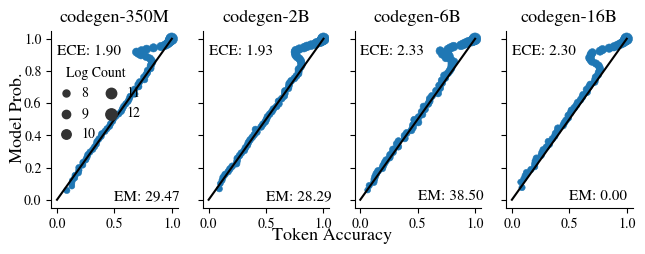

In [2]:
from calibration_metric.vis.calibration_plot import get_df_from_file, plot_df
from matplotlib import pyplot as plt

plt.rcParams["font.family"] = "Nimbus Roman"

fig, ax = plt.subplots(1,4, figsize=(7.5,2.3), sharex=True, sharey=True)

paths_and_models = [("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/codegen-350M_calflow/outputs/test_all.logits",
                    "codegen-350M"),
                    ("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/codegen-2B_calflow/outputs/test_all.logits",
                    "codegen-2B"),
                    ("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/codegen-6B_calflow/outputs/test_all.logits",
                    "codegen-6B"),
                    ("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/codegen-16B_calflow/outputs/test_all.logits",
                    "codegen-16B")]

metric_kwargs = {"x": 0.000, "y": 0.9, "fontsize": 11, "horizontalalignment": "left"}
em_kwargs = {"x": 0.50, "y": 0.0, "fontsize": 11, "horizontalalignment": "left"}

em_scores = {'codegen-350M': 29.47, 'codegen-2B': 28.29, 'codegen-6B': 38.5, "codegen-16B": 0.0} 
for i, (path, model) in enumerate(paths_and_models):
        df, ece = get_df_from_file(path, n_bins=10, binning_strategy="adaptive") 
        plot_df(df, 
                ax=ax[i],
                title=model, 
                metric_value=ece, 
                metric_value_kwargs=metric_kwargs,
                xlabel=None,
                ylabel=None,
                show_legend=False) 

        em_value = em_scores[model]
        ax[i].text(s=f"EM: {em_value:.2f}", **em_kwargs)
        ax[i].set_title(model, fontsize=13)

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, title="Log Count", frameon=False, bbox_to_anchor=(0.26, 0.78), handletextpad=0.1, columnspacing=0.1)
fig.text(0.07, 0.5, "Model Prob.", va='center', rotation='vertical', fontsize=13)
fig.text(0.5, -0.03, "Token Accuracy", ha='center', fontsize=13)


plt.savefig("/home/estengel/papers/calibration-parsing-2023/figures/fewshot_calibration.pdf", bbox_inches="tight")

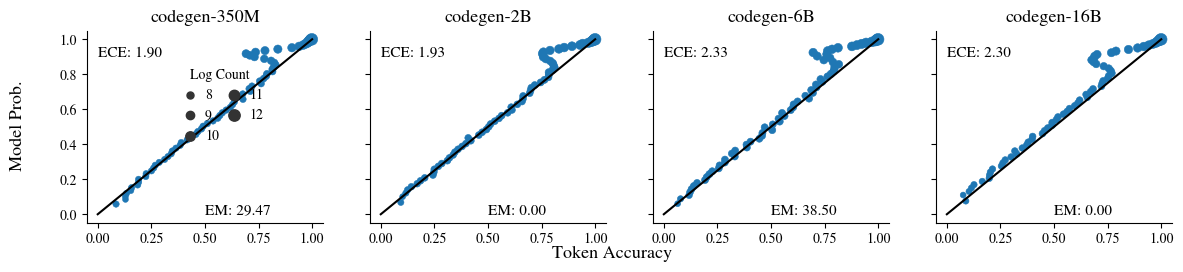

In [3]:
from calibration_metric.vis.calibration_plot import get_df_from_file, plot_df
from matplotlib import pyplot as plt

plt.rcParams["font.family"] = "Nimbus Roman"

fig, ax = plt.subplots(1,4, figsize=(14,2.5), sharex=True, sharey=True)

paths_and_models = [("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/codegen-350M_calflow/outputs/test_all.logits",
                    "codegen-350M"),
                    ("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/codegen-2B_calflow/outputs/test_all.logits",
                    "codegen-2B"),
                    ("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/codegen-6B_calflow/outputs/test_all.logits",
                    "codegen-6B"),
                    ("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/codegen-16B_calflow/outputs/test_all.logits",
                    "codegen-16B")]

metric_kwargs = {"x": 0.000, "y": 0.9, "fontsize": 11, "horizontalalignment": "left"}
em_kwargs = {"x": 0.50, "y": 0.0, "fontsize": 11, "horizontalalignment": "left"}

em_scores = {'codegen-350M': 29.47, 'codegen-2B': 0.00, 'codegen-6B': 38.5, "codegen-16B": 0.0} 
for i, (path, model) in enumerate(paths_and_models):
        df, ece = get_df_from_file(path, n_bins=10, binning_strategy="adaptive") 
        plot_df(df, 
                ax=ax[i],
                title=model, 
                metric_value=ece, 
                metric_value_kwargs=metric_kwargs,
                xlabel=None,
                ylabel=None,
                show_legend=False) 

        em_value = em_scores[model]
        ax[i].text(s=f"EM: {em_value:.2f}", **em_kwargs)
        ax[i].set_title(model, fontsize=13)

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, title="Log Count", frameon=False, bbox_to_anchor=(0.26, 0.78), handletextpad=0.1, columnspacing=0.1)
fig.text(0.07, 0.5, "Model Prob.", va='center', rotation='vertical', fontsize=13)
fig.text(0.5, -0.03, "Token Accuracy", ha='center', fontsize=13)


plt.savefig("/home/estengel/papers/calibration-parsing-2023/figures/fewshot_calibration_wide.pdf", bbox_inches="tight")